In [1]:
# Import

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# https://stackoverflow.com/questions/42869495/numpy-version-of-exponential-weighted-moving-average-equivalent-to-pandas-ewm
def exp_moving_average(data,alpha):

    alpha_rev = 1-alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+1)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

In [4]:
def create_avg_plot(data, colors, labels, ylabel, title, loc, log = False):

    for i, (d1, d2, d3, d4, d5) in enumerate(data):
        d1 = exp_moving_average(d1, 1 / 1000)
        d2 = exp_moving_average(d2, 1 / 1000)
        d3 = exp_moving_average(d3, 1 / 1000)
        d4 = exp_moving_average(d4, 1 / 1000)
        d5 = exp_moving_average(d5, 1 / 1000)
        minimum = np.minimum.reduce([d1, d2, d3, d4, d5])
        maximum = np.maximum.reduce([d1, d2, d3, d4, d5])
        mean = (d1 + d2 + d3 + d4 + d5) / 5

        plt.plot(mean, color = colors[i],label = labels[i])
        if log:
            plt.yscale('log')
        plt.fill_between(np.linspace(0, len(d1), len(d1)), minimum, maximum, color = colors[i], alpha = 0.2)
        plt.legend(loc=loc)
        plt.ylabel(ylabel)
        plt.xlabel("Episodes")
        plt.title(title)

    plt.show()

#### Exemplary use of the above function to generate plots for different gamma values

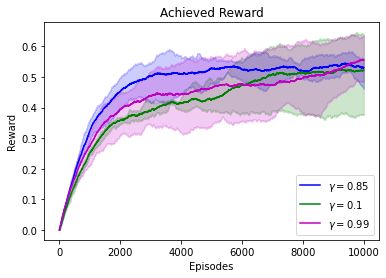

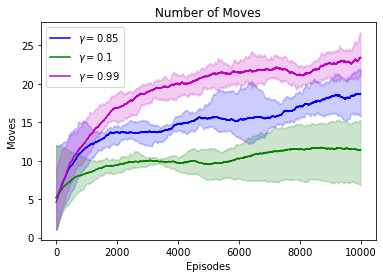

In [5]:
with open("R_gamma_0_1_1.npy", "rb") as f:
    gsR1 = np.load(f, allow_pickle=True)

with open("R_gamma_0_1_2.npy", "rb") as f:
    gsR2 = np.load(f, allow_pickle=True)

with open("R_gamma_0_1_3.npy", "rb") as f:
    gsR3 = np.load(f, allow_pickle=True)

with open("R_gamma_0_1_4.npy", "rb") as f:
    gsR4 = np.load(f, allow_pickle=True)
    
with open("R_gamma_0_1_5.npy", "rb") as f:
    gsR5 = np.load(f, allow_pickle=True)
    
with open("R_gamma_0_99_1.npy", "rb") as f:
    glR1 = np.load(f, allow_pickle=True)

with open("R_gamma_0_99_2.npy", "rb") as f:
    glR2 = np.load(f, allow_pickle=True)

with open("R_gamma_0_99_3.npy", "rb") as f:
    glR3 = np.load(f, allow_pickle=True)

with open("R_gamma_0_99_4.npy", "rb") as f:
    glR4 = np.load(f, allow_pickle=True)
    
with open("R_gamma_0_99_5.npy", "rb") as f:
    glR5 = np.load(f, allow_pickle=True)
    
with open("R_q1.npy", "rb") as f:
    QR1 = np.load(f, allow_pickle=True)

with open("R_q2.npy", "rb") as f:
    QR2 = np.load(f, allow_pickle=True)

with open("R_q3.npy", "rb") as f:
    QR3 = np.load(f, allow_pickle=True)

with open("R_q4.npy", "rb") as f:
    QR4 = np.load(f, allow_pickle=True)
    
with open("R_q5.npy", "rb") as f:
    QR5 = np.load(f, allow_pickle=True)
    
data = [(QR1, QR2, QR3, QR4, QR5), (gsR1, gsR2, gsR3, gsR4, gsR5), (glR1, glR2, glR3, glR4, glR5)]
colors = ["b", "g", "m"]
labels = ["$\gamma = 0.85$", "$\gamma = 0.1$", "$\gamma = 0.99$"]
ylabel = "Reward"
title = "Achieved Reward"

create_avg_plot_SQ(data, colors, labels, ylabel, title, "lower right")

with open("moves_gamma_0_1_1.npy", "rb") as f:
    gsM1 = np.load(f, allow_pickle=True)

with open("moves_gamma_0_1_2.npy", "rb") as f:
    gsM2 = np.load(f, allow_pickle=True)

with open("moves_gamma_0_1_3.npy", "rb") as f:
    gsM3 = np.load(f, allow_pickle=True)

with open("moves_gamma_0_1_4.npy", "rb") as f:
    gsM4 = np.load(f, allow_pickle=True)
    
with open("moves_gamma_0_1_5.npy", "rb") as f:
    gsM5 = np.load(f, allow_pickle=True)

with open("moves_gamma_0_99_1.npy", "rb") as f:
    glM1 = np.load(f, allow_pickle=True)

with open("moves_gamma_0_99_2.npy", "rb") as f:
    glM2 = np.load(f, allow_pickle=True)

with open("moves_gamma_0_99_3.npy", "rb") as f:
    glM3 = np.load(f, allow_pickle=True)

with open("moves_gamma_0_99_4.npy", "rb") as f:
    glM4 = np.load(f, allow_pickle=True)
    
with open("moves_gamma_0_99_5.npy", "rb") as f:
    glM5 = np.load(f, allow_pickle=True)
    
with open("moves_q1.npy", "rb") as f:
    QM1 = np.load(f, allow_pickle=True)

with open("moves_q2.npy", "rb") as f:
    QM2 = np.load(f, allow_pickle=True)

with open("moves_q3.npy", "rb") as f:
    QM3 = np.load(f, allow_pickle=True)

with open("moves_q4.npy", "rb") as f:
    QM4 = np.load(f, allow_pickle=True)
    
with open("moves_q5.npy", "rb") as f:
    QM5 = np.load(f, allow_pickle=True)
    
data = [(QM1, QM2, QM3, QM4, QM5), (gsM1, gsM2, gsM3, gsM4, gsM5), (glM1, glM2, glM3, glM4, glM5)]
colors = ["b", "g", "m"]
labels = ["$\gamma = 0.85$", "$\gamma = 0.1$", "$\gamma = 0.99$"]
ylabel = "Moves"
title = "Number of Moves"

create_avg_plot_SQ(data, colors, labels, ylabel, title, "upper left")

#### Exemplary use of the above function to generate plots for different beta values

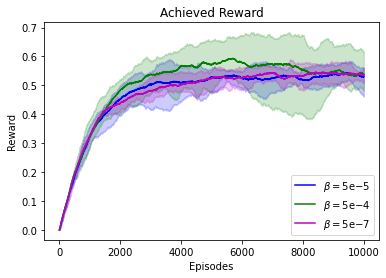

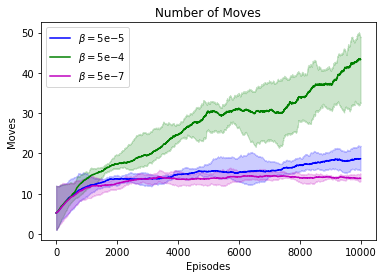

In [8]:
with open("R_beta_plus00_1.npy", "rb") as f:
    bsR1 = np.load(f, allow_pickle=True)

with open("R_beta_plus00_2.npy", "rb") as f:
    bsR2 = np.load(f, allow_pickle=True)

with open("R_beta_plus00_3.npy", "rb") as f:
    bsR3 = np.load(f, allow_pickle=True)

with open("R_beta_plus00_4.npy", "rb") as f:
    bsR4 = np.load(f, allow_pickle=True)
    
with open("R_beta_plus00_5.npy", "rb") as f:
    bsR5 = np.load(f, allow_pickle=True)
    
with open("R_beta_minus0_1.npy", "rb") as f:
    glR1 = np.load(f, allow_pickle=True)

with open("R_beta_minus0_2.npy", "rb") as f:
    glR2 = np.load(f, allow_pickle=True)

with open("R_beta_minus0_3.npy", "rb") as f:
    glR3 = np.load(f, allow_pickle=True)
    
with open("R_beta_minus0_4.npy", "rb") as f:
    glR4 = np.load(f, allow_pickle=True)
    
with open("R_beta_minus0_5.npy", "rb") as f:
    glR5 = np.load(f, allow_pickle=True)
    
data = [(QR1, QR2, QR3, QR4, QR5), (glR1, glR2, glR3, glR4, glR5), (bsR1, bsR2, bsR3, bsR4, bsR5)]
colors = ["b", "g", "m"]
labels = ["$\\beta = 5\mathrm{e}{-5}$", "$\\beta = 5\mathrm{e}{-4}$", "$\\beta = 5\mathrm{e}{-7}$"]
ylabel = "Reward"
title = "Achieved Reward"

create_avg_plot_SQ(data, colors, labels, ylabel, title, "lower right")

with open("moves_beta_plus00_1.npy", "rb") as f:
    bsM1 = np.load(f, allow_pickle=True)

with open("moves_beta_plus00_2.npy", "rb") as f:
    bsM2 = np.load(f, allow_pickle=True)

with open("moves_beta_plus00_3.npy", "rb") as f:
    bsM3 = np.load(f, allow_pickle=True)

with open("moves_beta_plus00_4.npy", "rb") as f:
    bsM4 = np.load(f, allow_pickle=True)
    
with open("moves_beta_plus00_5.npy", "rb") as f:
    bsM5 = np.load(f, allow_pickle=True)

with open("moves_beta_minus0_1.npy", "rb") as f:
    blM1 = np.load(f, allow_pickle=True)
    
with open("moves_beta_minus0_2.npy", "rb") as f:
    blM2 = np.load(f, allow_pickle=True)
    
with open("moves_beta_minus0_3.npy", "rb") as f:
    blM3 = np.load(f, allow_pickle=True)
    
with open("moves_beta_minus0_4.npy", "rb") as f:
    blM4 = np.load(f, allow_pickle=True)
    
with open("moves_beta_minus0_5.npy", "rb") as f:
    blM5 = np.load(f, allow_pickle=True)
    
data = [(QM1, QM2, QM3, QM4, QM5), (blM1, blM2, blM3, blM4, blM5), (bsM1, bsM2, bsM3, bsM4, bsM5)]
colors = ["b", "g", "m"]
labels = ["$\\beta = 5\mathrm{e}{-5}$", "$\\beta = 5\mathrm{e}{-4}$", "$\\beta = 5\mathrm{e}{-7}$"]
ylabel = "Moves"
title = "Number of Moves"

create_avg_plot_SQ(data, colors, labels, ylabel, title, "upper left")